In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows', 999)
pd.set_option('expand_frame_repr', True)

pd.set_option('max_rows',999)
pd.set_option('large_repr','truncate')
pd.set_option('max_colwidth',1000)

In [3]:
df = pd.read_csv('obesity.csv')
df2 = pd.read_csv('IndicatorNames.csv')


In [4]:
for i in range(len(df2)):
    if str(df2['IndicatorID'][i]) in df.columns:
        df.rename(columns={str(df2['IndicatorID'][i]):str(df2['IndicatorName'][i])},inplace=True)
        #renaming columns that have df2's ID to df2's Indicator Names
        

        
        

In [5]:
df3 = pd.read_csv('UARegions.csv')


In [6]:
df['Region'] = ' '
for i in range(len(df)):
    for a in range(len(df3)):
        
        if df['UA'][i] == df3['UA'][a]:
            df['Region'][i] = df3['Region'][a]

#for every value in df, search through df3 and replace any that match up with the correct information
    

<ipython-input-6-f096e6243910>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'][i] = df3['Region'][a]


In [7]:
for row in range(len(df)):
    if df['obesity'][row] == -1:
        df['obesity'][row] = np.nan

#replacing -1's with NaNs
    

<ipython-input-7-1b70713b8247>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obesity'][row] = np.nan
C:\Users\jackr\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
del df['% population aged under 18']

In [9]:
del df['% population aged 65+']

In [10]:
del df ['Emergency hospital admissions due to falls in people aged 65 and over']

In [11]:
del df['Air pollution: fine particulate matter']

In [12]:
df = pd.get_dummies(df, columns=['Region','UA'],drop_first = True) #turn words to 'binary'

In [13]:
nan_rows = df[df.isnull().any(1)]

In [14]:
filtered_df = df[df.notnull().all(1)]

In [15]:
filtered_df

ID  Year  obesity  popCount  Pupil absence  \
0        1  2014    180.0      1085       4.383732   
1        2  2015    159.0      1058       4.250922   
2        3  2016    187.0      1123       4.344340   
3        4  2011    181.0       825       5.512606   
4        5  2012    172.0       794       5.926979   
...    ...   ...      ...       ...            ...   
1780  1781  2012   1267.0      6179       5.613705   
1781  1782  2013   1382.0      6233       4.888293   
1782  1783  2014   1372.0      6385       5.063126   
1783  1784  2016   1670.0      7053       4.975646   
1784  1785  2017   1739.0      7147       5.165136   

      Violent crime - violence offences per 1,000 population  Fuel poverty  \
0                                                   8.040406      8.467609   
1                                                   8.525703     11.047893   
2                                                  10.975628      9.953051   
3                                                   7.557846     11.127799   
4                                                   6.854248     10.318161   
...                                                      ...           ...   
1780                                                8.676025     13.982542   
1781                                               11.023355     13.913401   
1782                                               12.874637     13.000468   
1783                                               30.069598     14.093320   
1784                                               39.524140     13.304698   

      Excess winter deaths index  \
0                      31.813629   
1                      12.942632   
2                      16.915286   
3                       2.567711   
4                      20.419088   
...                          ...   
1780                   24.359056   
1781                    9.520664   
1782                   24.307818   
1783                   14.329535   
1784                   30.252522   

      Violent crime - sexual offences per 1,000 population  \
0                                                 0.968205   
1                                                 0.838410   
2                                                 1.268471   
3                                                 0.647081   
4                                                 0.475188   
...                                                    ...   
1780                                              0.966985   
1781                                              1.280089   
1782                                              1.871766   
1783                                              3.215039   
1784                                              3.817025   

      Economic inactivity rate  Affordability of home ownership  \
0                    18.163958                         6.759034   
1                    15.873303                         6.971544   
2                    18.595531                         6.890588   
3                    19.558270                         5.949472   
4                    20.155832                         5.777440   
...                        ...                              ...   
1780                 27.625360                         5.423257   
1781                 25.533892                         5.311942   
1782                 28.720891                         5.403018   
1783                 27.625360                         5.534571   
1784                 28.355714                         5.585169   

      Gender pay gap (by workplace location)  Average weekly earnings  \
0                                  29.410996               385.876309   
1                                  25.648381               413.378808   
2                                  21.682381               426.980407   
3                                  24.224689               337.555714   
4                                  20.360381               345.570348   
.

In [16]:
nan_rows_copy = nan_rows.copy()

In [17]:
filtered_df_copy = filtered_df.copy()

In [18]:
filtered_df.describe()

ID         Year      obesity      popCount  Pupil absence  \
count  1785.000000  1785.000000  1785.000000   1785.000000    1785.000000   
mean    893.000000  2013.964706   325.544538   1673.557423       4.709599   
std     515.429433     1.988585   310.539198   1297.676009       0.466682   
min       1.000000  2011.000000    20.000000    147.000000       3.109155   
25%     447.000000  2012.000000   153.000000    927.000000       4.371273   
50%     893.000000  2014.000000   214.000000   1216.000000       4.678456   
75%    1339.000000  2016.000000   397.000000   2054.000000       5.003903   
max    1785.000000  2017.000000  3915.000000  15311.000000       6.249160   

       Violent crime - violence offences per 1,000 population  Fuel poverty  \
count                                             1785.000000   1785.000000   
mean                                                13.800337     10.157074   
std                                                  7.026534      2.385523   
min                                                  2.602158      3.698885   
25%                                                  8.368363      8.325650   
50%                                                 12.143513      9.953115   
75%                                                 17.590775     11.685997   
max                                                 56.415651     20.978986   

       Excess winter deaths index  \
count                 1785.000000   
mean                    20.218505   
std                     10.051209   
min                    -12.074533   
25%                     13.538406   
50%                     19.648387   
75%                     27.034970   
max                     57.167935   

       Violent crime - sexual offences per 1,000 population  \
count                                           1785.000000   
mean                                               1.312919   
std                                                0.697385   
min                                                0.191972   
25%                                                0.791049   
50%                                                1.172175   
75%                                                1.683919   
max                                                5.183984   

       Economic inactivity rate  Affordability of home ownership  \
count               1785.000000                      1785.000000   
mean                  20.977011                         7.882954   
std                    4.496145                         2.678679   
min                    7.109057                         3.166602   
25%                   17.765583                         5.969711   
50%                   20.653801                         7.416803   
75%                   23.940393                         9.086525   
max                   35.194481                        30.246456   

       Gender pay gap (by workplace location)  Average weekly earnings  \
count                             1785.000000              1785.000000   
mean                                19.628652               416.021308   
std                                  8.221602                71.097258   
min                                  0.123612               278.460259   
25%                                 13.852073               365.191237   
50%                                 19.445150               400.409068   
75%                                 24.936535               454.316628   
max                                 46.393612               799.178681   

       Region_East of England  Region_London  Region_North East  \
count             1785.000000    1785.000000        1785.000000   
mean                 0.143978       0.100280           0.037535   
std                  0.351165       0.300457           0.190122   
min                  0.000000       0.000000           0.000000   
25%                  0.000000       0.000000           0.000000   
50%                  0.000

In [19]:
corr_matrix = filtered_df.corr()
corr_matrix['obesity'].sort_values(ascending=False)


obesity                                                   1.000000
popCount                                                  0.976714
UA_WM20                                                   0.577337
Economic inactivity rate                                  0.392109
Fuel poverty                                              0.378590
Violent crime - violence offences per 1,000 population    0.328332
Region_London                                             0.266960
Violent crime - sexual offences per 1,000 population      0.262643
UA_YH09                                                   0.226831
UA_YH21                                                   0.213308
Region_Yorkshire and the Humber                           0.177934
UA_NW16                                                   0.165675
UA_YH13                                                   0.155225
Region_West Midlands                                      0.136804
UA_WM23                                                   0.13

In [20]:
filtered_df.isnull().any()

ID                                                        False
Year                                                      False
obesity                                                   False
popCount                                                  False
Pupil absence                                             False
Violent crime - violence offences per 1,000 population    False
Fuel poverty                                              False
Excess winter deaths index                                False
Violent crime - sexual offences per 1,000 population      False
Economic inactivity rate                                  False
Affordability of home ownership                           False
Gender pay gap (by workplace location)                    False
Average weekly earnings                                   False
Region_East of England                                    False
Region_London                                             False
Region_North East                       

In [21]:
corr_matrix2 = nan_rows.corr()
corr_matrix2['obesity'].sort_values(ascending=False)

ID                                                       NaN
Year                                                     NaN
obesity                                                  NaN
popCount                                                 NaN
Pupil absence                                            NaN
Violent crime - violence offences per 1,000 population   NaN
Fuel poverty                                             NaN
Excess winter deaths index                               NaN
Violent crime - sexual offences per 1,000 population     NaN
Economic inactivity rate                                 NaN
Affordability of home ownership                          NaN
Gender pay gap (by workplace location)                   NaN
Average weekly earnings                                  NaN
Region_East of England                                   NaN
Region_London                                            NaN
Region_North East                                        NaN
Region_North West       

In [22]:
del nan_rows['ID']
del filtered_df['ID']

In [23]:
filtered_df.columns

Index(['Year', 'obesity', 'popCount', 'Pupil absence',
       'Violent crime - violence offences per 1,000 population',
       'Fuel poverty', 'Excess winter deaths index',
       'Violent crime - sexual offences per 1,000 population',
       'Economic inactivity rate', 'Affordability of home ownership',
       ...
       'UA_YH12', 'UA_YH13', 'UA_YH14', 'UA_YH15', 'UA_YH16', 'UA_YH17',
       'UA_YH18', 'UA_YH19', 'UA_YH20', 'UA_YH21'],
      dtype='object', length=342)

In [24]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
filtered_df[['Year','popCount','Pupil absence','Violent crime - violence offences per 1,000 population','Fuel poverty','Excess winter deaths index','Violent crime - sexual offences per 1,000 population','Economic inactivity rate','Affordability of home ownership','Gender pay gap (by workplace location)','Average weekly earnings']] = minmax.fit_transform(filtered_df[['Year','popCount','Pupil absence','Violent crime - violence offences per 1,000 population','Fuel poverty','Excess winter deaths index','Violent crime - sexual offences per 1,000 population','Economic inactivity rate','Affordability of home ownership','Gender pay gap (by workplace location)','Average weekly earnings']])
nan_rows[['Year','popCount','Pupil absence','Violent crime - violence offences per 1,000 population','Fuel poverty','Excess winter deaths index','Violent crime - sexual offences per 1,000 population','Economic inactivity rate','Affordability of home ownership','Gender pay gap (by workplace location)','Average weekly earnings']] = minmax.fit_transform(nan_rows[['Year','popCount','Pupil absence','Violent crime - violence offences per 1,000 population','Fuel poverty','Excess winter deaths index','Violent crime - sexual offences per 1,000 population','Economic inactivity rate','Affordability of home ownership','Gender pay gap (by workplace location)','Average weekly earnings']])

<ipython-input-24-dc6854bc975d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['Year','popCount','Pupil absence','Violent crime - violence offences per 1,000 population','Fuel poverty','Excess winter deaths index','Violent crime - sexual offences per 1,000 population','Economic inactivity rate','Affordability of home ownership','Gender pay gap (by workplace location)','Average weekly earnings']] = minmax.fit_transform(filtered_df[['Year','popCount','Pupil absence','Violent crime - violence offences per 1,000 population','Fuel poverty','Excess winter deaths index','Violent crime - sexual offences per 1,000 population','Economic inactivity rate','Affordability of home ownership','Gender pay gap (by workplace location)','Average weekl

In [25]:
filtered_df.head()

Year  obesity  popCount  Pupil absence  \
0  0.500000    180.0  0.061857       0.405916   
1  0.666667    159.0  0.060076       0.363619   
2  0.833333    187.0  0.064363       0.393370   
3  0.000000    181.0  0.044711       0.765429   
4  0.166667    172.0  0.042667       0.897395   

   Violent crime - violence offences per 1,000 population  Fuel poverty  \
0                                                0.101057      0.275966   
1                                                0.110075      0.425287   
2                                                0.155602      0.361929   
3                                                0.092090      0.429911   
4                                                0.079015      0.383058   

   Excess winter deaths index  \
0                    0.633833   
1                    0.361298   
2                    0.418671   
3                    0.211463   
4                    0.469273   

   Violent crime - sexual offences per 1,000 population  \
0                                              0.155495   
1                                              0.129494   
2                                              0.215644   
3                                              0.091167   
4                                              0.056734   

   Economic inactivity rate  Affordability of home ownership  \
0                  0.393617                         0.132661   
1                  0.312057                         0.140508   
2                  0.408983                         0.137519   
3                  0.443262                         0.102765   
4                  0.464539                         0.096413   

   Gender pay gap (by workplace location)  Average weekly earnings  \
0                                0.632967                 0.206284   
1                                0.551648                 0.259101   
2                                0.465934                 0.285222   
3                                0.520879                 0.113488   
4                                0.437363                 0.128880   

   Region_East of England  Region_London  Region_North East  \
0                       0              0                  0   
1                       0              0                  0   
2                       0              0                  0   
3                       0              0                  0   
4                       0              0                  0   

   Region_North West  Region_South East  Region_South West  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   

   Region_West Midlands  Region_Yorkshire and the Humber  UA_EE02  UA_EE03  \
0                     0                                0        0        0   
1                     0                                0        0        0   
2                     0                                0        0        0   
3                     0                                0        0        0   
4                     0                                0        0        0   

   UA_EE04  UA_EE05  UA_EE06  UA_EE07  UA_EE08  UA_EE09  UA_EE10  UA_EE11  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   UA_EE12  UA_EE13  UA_EE14  UA_EE15  UA_EE16  UA_EE17  UA_EE18  UA_EE19  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        

In [26]:
features = filtered_df.loc[:,filtered_df.columns != "obesity"].values

In [27]:
labels = filtered_df['obesity']

In [28]:
#X_test = nan_rows.loc[:,nan_rows.columns != "obesity"].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.1,random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
y_pred[0:10]

array([141.13671875, 166.1640625 , 195.24609375, 186.59375   ,
       658.10546875, 167.9375    , 150.4453125 , 963.6484375 ,
       329.83203125, 170.48828125])

In [33]:
y_test[0:10]

956     163.0
100     138.0
962     171.0
972     155.0
1702    653.0
1697    200.0
299     140.0
520     896.0
915     384.0
0       180.0
Name: obesity, dtype: float64

In [34]:
from sklearn.metrics import r2_score
r2_score_results = r2_score(y_test,y_pred)
print(r2_score_results)

0.9943391729813886


In [35]:
nan_rows['obesity']= regressor.predict(nan_rows.loc[:,nan_rows.columns != "obesity"].values)

<ipython-input-35-aa8297ea7522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows['obesity']= regressor.predict(nan_rows.loc[:,nan_rows.columns != "obesity"].values)


In [36]:
nan_rows = nan_rows.reset_index(drop=True)

In [37]:
nan_rows.notnull().all()

Year                                                      True
obesity                                                   True
popCount                                                  True
Pupil absence                                             True
Violent crime - violence offences per 1,000 population    True
Fuel poverty                                              True
Excess winter deaths index                                True
Violent crime - sexual offences per 1,000 population      True
Economic inactivity rate                                  True
Affordability of home ownership                           True
Gender pay gap (by workplace location)                    True
Average weekly earnings                                   True
Region_East of England                                    True
Region_London                                             True
Region_North East                                         True
Region_North West                                      

In [38]:
nan_rows.loc[:,nan_rows.columns != "obesity"].values.shape

(447, 341)

In [39]:
nan_rows

Year      obesity  popCount  Pupil absence  \
0    0.000000   126.960938  0.049841       0.476184   
1    0.333333   111.402344  0.046943       0.251181   
2    0.166667   102.542969  0.043393       0.549333   
3    0.500000   115.085938  0.029412       0.408054   
4    0.166667   157.140625  0.047160       0.761887   
5    1.000000   121.238281  0.034773       0.412342   
6    0.666667   115.265625  0.032092       0.263872   
7    0.000000   105.378906  0.029194       0.521259   
8    0.333333   397.781250  0.128803       0.301309   
9    0.333333   127.769531  0.042379       0.160191   
10   0.333333   133.503906  0.043248       0.413730   
11   0.166667   139.070312  0.048609       0.542767   
12   0.666667    78.269531  0.029919       0.366897   
13   0.166667   212.824219  0.079615       0.540772   
14   0.833333   244.019531  0.088742       0.244613   
15   0.166667    43.339844  0.048030       0.278976   
16   0.166667   190.042969  0.054984       0.771820   
17   1.000000   855.085938  0.227760       0.403665   
18   0.500000   161.042969  0.052014       0.342764   
19   1.000000   202.261719  0.061794       0.337133   
20   0.666667    52.742188  0.037163       0.162892   
21   1.000000    82.175781  0.043828       0.277889   
22   0.500000   120.691406  0.040713       0.125115   
23   1.000000   140.003906  0.044987       0.245783   
24   0.166667    93.707031  0.023689       0.716078   
25   0.166667   537.941406  0.159012       0.602098   
26   0.333333    57.968750  0.025572       0.069410   
27   1.000000    31.925781  0.020501       0.294854   
28   0.666667   120.210938  0.040423       0.146973   
29   1.000000   176.781250  0.054839       0.103536   
30   0.333333    20.886719  0.008476       0.242121   
31   0.000000    97.804688  0.028470       0.483720   
32   0.500000    30.226562  0.011663       0.231989   
33   0.166667    95.253906  0.043248       0.334271   
34   0.833333    81.425781  0.040351       0.148023   
35   0.833333   164.285156  0.048971       0.308747   
36   0.333333   154.621094  0.045929       0.273119   
37   0.500000   920.886719  0.264633       0.379649   
38   0.166667   183.425781  0.054405       0.670651   
39   1.000000   216.429688  0.063822       0.493959   
40   0.500000   134.656250  0.046146       0.237839   
41   0.833333   244.101562  0.083019       0.191618   
42   0.166667   205.488281  0.071066       0.473532   
43   1.000000   275.296875  0.091278       0.229645   
44   0.333333   137.058594  0.050855       0.265622   
45   0.166667   105.839844  0.043031       0.523807   
46   0.666667   144.718750  0.053390       0.227411   
47   1.000000   192.011719  0.065198       0.214565   
48   0.000000   143.386719  0.056433       0.405477   
49   0.833333   149.679688  0.054187       0.246700   
50   0.333333    85.789062  0.038757       0.067693   
51   0.666667   152.671875  0.056578       0.205915   
52   1.000000   182.726562  0.046001       0.630099   
53   0.666667   162.089844  0.041003       0.521393   
54   0.500000   750.441406  0.189800       0.316324   
55   0.166667   680.296875  0.173500       0.439063   
56   0.333333   705.871094  0.180672       0.269523   
57   0.666667   327.996094  0.103448       0.269981   
58   0.333333   289.054688  0.093741       0.317676   
59   0.166667   291.062500  0.094538       0.541758   
60   0.666667   489.851562  0.146262       0.325972   
61   0.333333   453.867188  0.138583       0.332859   
62   0.000000   106.476562  0.043973       0.401625   
63   0.333333    81.347656  0.035859       0.182455   
64   0.000000    83.289062  0.035642       0.484738   
65   0.833333   154.257812  0.042596       0.393626   
66   0.333333   112.855469  0.032020       0.359618   
67   1.000000   223.156250  0.059910       0.255337   
68   0.333333   143.898438  0.040640       0.177604   
69   0.166667   130.816406  0.036873       0.390017   
70   0.833333   182.910156  0.051507       0.190655   
71   0.333333   109.640625  0.044697       0.3877

In [40]:
nan_rows_copy['obesity'] = nan_rows['obesity']

In [41]:
for row in range(len(nan_rows)):
    nan_rows_copy['obesity'][row] = nan_rows['obesity'][row]
    
    

<ipython-input-41-ead1d9a44b57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows_copy['obesity'][row] = nan_rows['obesity'][row]


In [42]:
nan_rows_copy['obesity'] = nan_rows['obesity'].values

In [43]:
nan_rows_copy['obesity'].round(1)

1785     127.0
1786     111.4
1787     102.5
1788     115.1
1789     157.1
1790     121.2
1791     115.3
1792     105.4
1793     397.8
1794     127.8
1795     133.5
1796     139.1
1797      78.3
1798     212.8
1799     244.0
1800      43.3
1801     190.0
1802     855.1
1803     161.0
1804     202.3
1805      52.7
1806      82.2
1807     120.7
1808     140.0
1809      93.7
1810     537.9
1811      58.0
1812      31.9
1813     120.2
1814     176.8
1815      20.9
1816      97.8
1817      30.2
1818      95.3
1819      81.4
1820     164.3
1821     154.6
1822     920.9
1823     183.4
1824     216.4
1825     134.7
1826     244.1
1827     205.5
1828     275.3
1829     137.1
1830     105.8
1831     144.7
1832     192.0
1833     143.4
1834     149.7
1835      85.8
1836     152.7
1837     182.7
1838     162.1
1839     750.4
1840     680.3
1841     705.9
1842     328.0
1843     289.1
1844     291.1
1845     489.9
1846     453.9
1847     106.5
1848      81.3
1849      83.3
1850     154.3
1851     1

In [44]:
new_df = filtered_df_copy.append(nan_rows_copy)

In [45]:
new_df.round(1)

ID  Year  obesity  popCount  Pupil absence  \
0        1  2014    180.0      1085            4.4   
1        2  2015    159.0      1058            4.3   
2        3  2016    187.0      1123            4.3   
3        4  2011    181.0       825            5.5   
4        5  2012    172.0       794            5.9   
...    ...   ...      ...       ...            ...   
2227  2228  2015    662.8      2946            5.0   
2228  2229  2012    297.5      1607            4.7   
2229  2230  2015    357.4      1808            4.3   
2230  2231  2017    390.7      1909            4.7   
2231  2232  2015   1678.6      6885            4.9   

      Violent crime - violence offences per 1,000 population  Fuel poverty  \
0                                                        8.0           8.5   
1                                                        8.5          11.0   
2                                                       11.0          10.0   
3                                                        7.6          11.1   
4                                                        6.9          10.3   
...                                                      ...           ...   
2227                                                    14.8          10.5   
2228                                                    11.7           8.5   
2229                                                    14.7          10.7   
2230                                                    21.7           9.0   
2231                                                    21.5          14.8   

      Excess winter deaths index  \
0                           31.8   
1                           12.9   
2                           16.9   
3                            2.6   
4                           20.4   
...                          ...   
2227                        11.0   
2228                        28.7   
2229                        14.6   
2230                        30.9   
2231                        15.0   

      Violent crime - sexual offences per 1,000 population  \
0                                                      1.0   
1                                                      0.8   
2                                                      1.3   
3                                                      0.6   
4                                                      0.5   
...                                                    ...   
2227                                                   2.5   
2228                                                   1.2   
2229                                                   1.9   
2230                                                   2.4   
2231                                                   2.7   

      Economic inactivity rate  Affordability of home ownership  \
0                         18.2                              6.8   
1                         15.9                              7.0   
2                         18.6                              6.9   
3                         19.6                              5.9   
4                         20.2                              5.8   
...                        ...                              ...   
2227                      24.6                              5.4   
2228                      21.5                              4.5   
2229                      24.1                              4.6   
2230                      20.6                              5.1   
2231                      26.1                              5.6   

      Gender pay gap (by workplace location)  Average weekly earnings  \
0                                       29.4                    385.9   
1                                       25.6                    413.4   
2                                       21.7                    427.0   
3                                       24.2                    337.6   
4                                       20.4                    345.6   
.

In [46]:
new_df['Obesity in children per 100 children'] = new_df['obesity']/new_df['popCount']*100

In [47]:
new_df

ID  Year      obesity  popCount  Pupil absence  \
0        1  2014   180.000000      1085       4.383732   
1        2  2015   159.000000      1058       4.250922   
2        3  2016   187.000000      1123       4.344340   
3        4  2011   181.000000       825       5.512606   
4        5  2012   172.000000       794       5.926979   
...    ...   ...          ...       ...            ...   
2227  2228  2015   662.750000      2946       5.031952   
2228  2229  2012   297.453125      1607       4.734801   
2229  2230  2015   357.445312      1808       4.269022   
2230  2231  2017   390.679688      1909       4.731210   
2231  2232  2015  1678.613281      6885       4.899763   

      Violent crime - violence offences per 1,000 population  Fuel poverty  \
0                                                   8.040406      8.467609   
1                                                   8.525703     11.047893   
2                                                  10.975628      9.953051   
3                                                   7.557846     11.127799   
4                                                   6.854248     10.318161   
...                                                      ...           ...   
2227                                               14.783017     10.471948   
2228                                               11.724993      8.489839   
2229                                               14.713056     10.691325   
2230                                               21.743651      8.967272   
2231                                               21.544198     14.822773   

      Excess winter deaths index  \
0                      31.813629   
1                      12.942632   
2                      16.915286   
3                       2.567711   
4                      20.419088   
...                          ...   
2227                   11.028418   
2228                   28.675500   
2229                   14.557840   
2230                   30.920932   
2231                   14.975467   

      Violent crime - sexual offences per 1,000 population  \
0                                                 0.968205   
1                                                 0.838410   
2                                                 1.268471   
3                                                 0.647081   
4                                                 0.475188   
...                                                    ...   
2227                                              2.540027   
2228                                              1.212436   
2229                                              1.855958   
2230                                              2.395323   
2231                                              2.684502   

      Economic inactivity rate  Affordability of home ownership  \
0                    18.163958                         6.759034   
1                    15.873303                         6.971544   
2                    18.595531                         6.890588   
3                    19.558270                         5.949472   
4                    20.155832                         5.777440   
...                        ...                              ...   
2227                 24.571153                         5.443496   
2228                 21.450550                         4.502380   
2229                 24.139580                         4.633934   
2230                 20.587405                         5.099432   
2231                 26.098256                         5.575050   

      Gender pay gap (by workplace location)  Average weekly earnings  \
0                                  29.410996               385.876309   
1                                  25.648381               413.378808   
2                                  21.682381               426.980407   
3                                  24.224689               337.555714   
4                         

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC09E0FE20>],
      dtype=object)

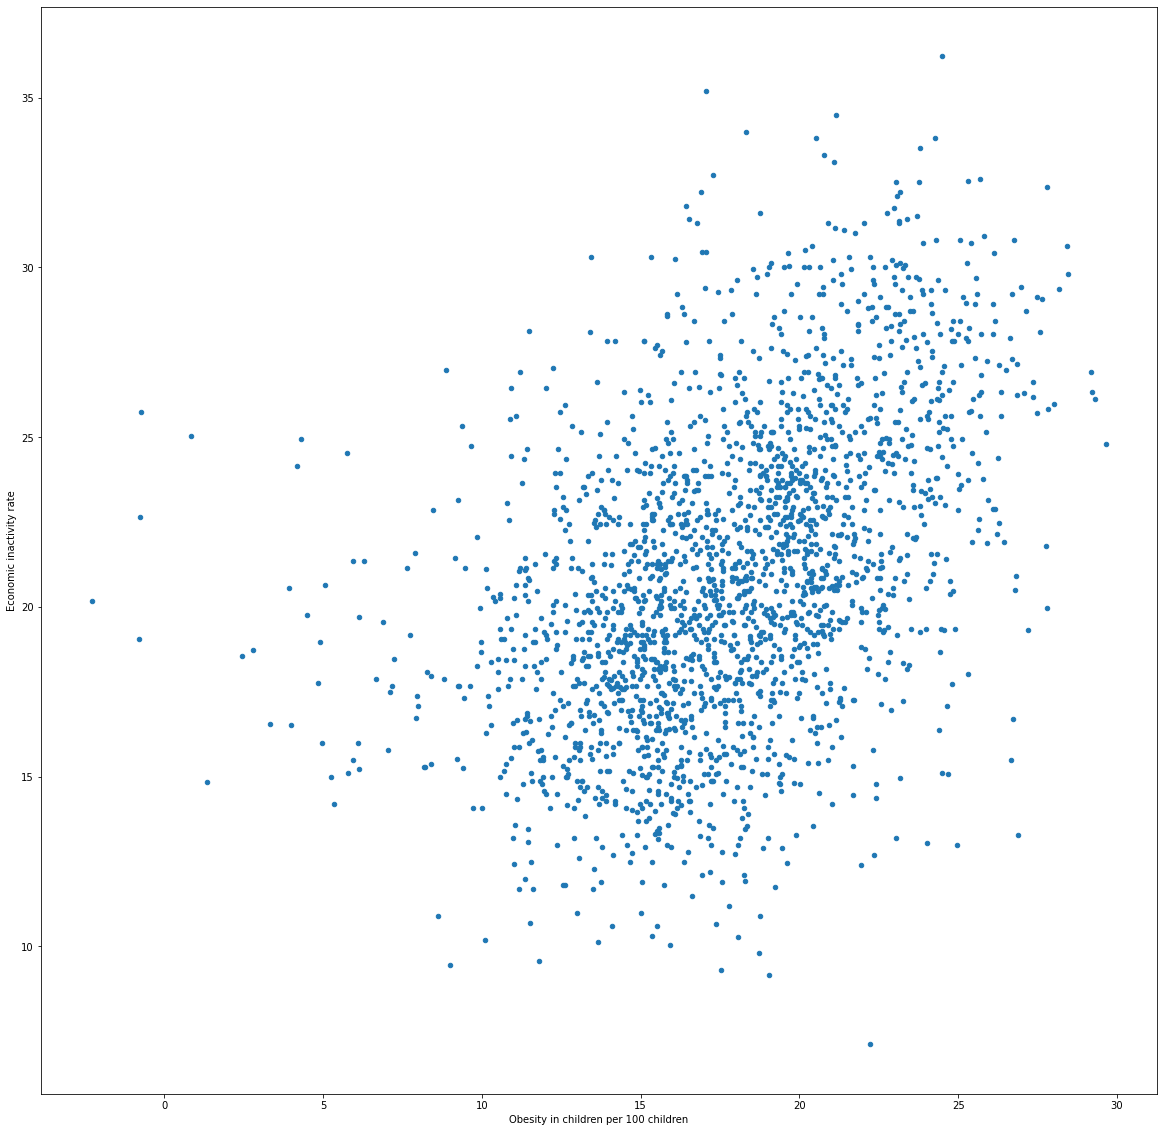

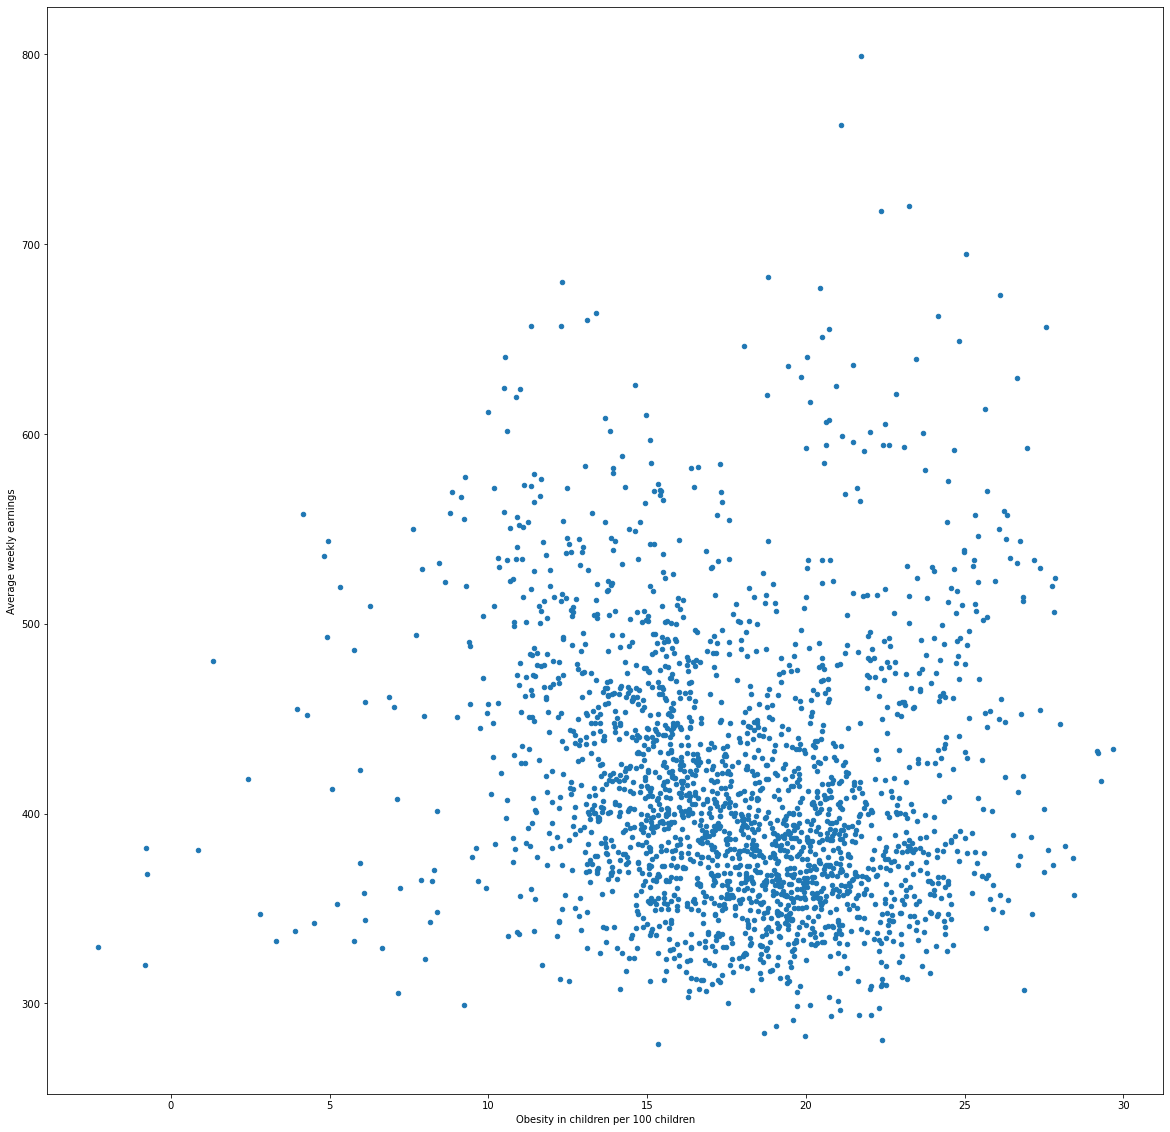

In [48]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import statsmodels.api as sm

#fig,axes = plt.subplots(nrows = 2,ncols = 1)

new_df.plot(y = 'Economic inactivity rate',x = 'Obesity in children per 100 children',kind = 'scatter',style = 'x',subplots = True,sharex = True,figsize = (20,20))
new_df.plot(y = 'Average weekly earnings',x = 'Obesity in children per 100 children',kind = 'scatter',style = 'x',subplots = True,sharex = True,figsize = (20,20))


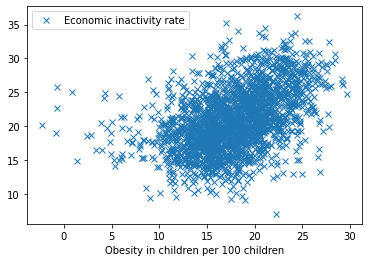

In [49]:
fig, ax = plt.subplots()
new_df.plot(x='Obesity in children per 100 children', y='Economic inactivity rate',style = 'x', ax=ax)

In [50]:
# plot the data itself
from matplotlib import pylab
num_rows = 5
num_cols = 3
def Plot(y):
    
    x = new_df['Obesity in children per 100 children']
    #y = new_df['Economic inactivity rate']
    plt.figure(figsize=(2*3*num_cols, 2*num_rows))
    plt.plot(x,y,'x')

    # calc the trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    # the line equation:
    print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

y=0.215679x+(6.321461)


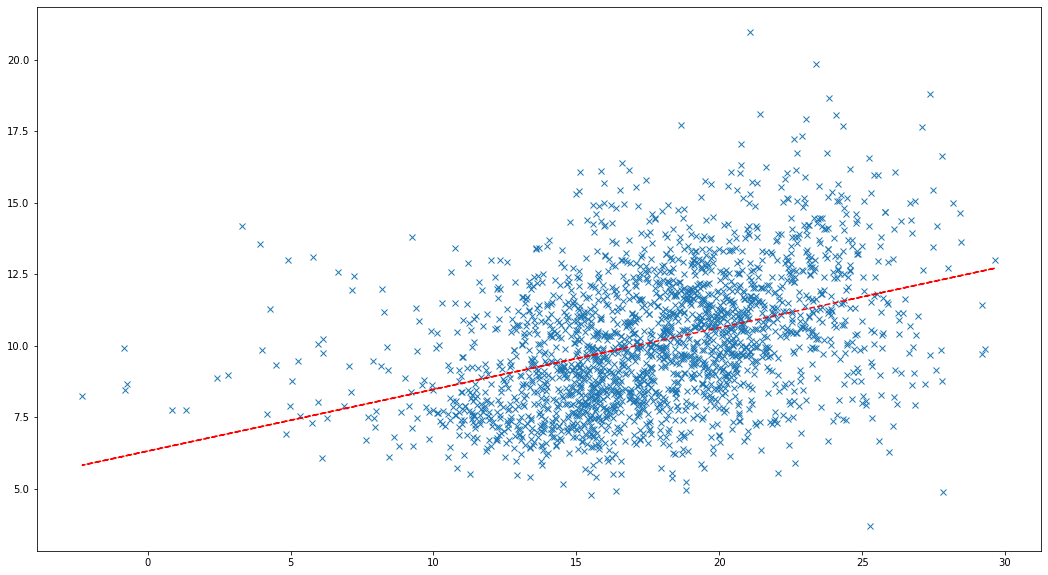

In [51]:
Plot(new_df['Fuel poverty'])

SyntaxError: invalid syntax (<ipython-input-52-fc342998698c>, line 1)

1
y=0.043600x+(2013.195913)
2
y=42.307603x+(-429.659598)
3
y=135.475030x+(-733.475622)
4
y=0.023359x+(4.300439)
5
y=0.805638x+(-0.470222)
6
y=0.215679x+(6.321461)
7
y=-0.022367x+(20.633104)
8
y=0.064591x+(0.170986)
9
y=0.471274x+(12.580372)
10
y=-0.094004x+(9.546383)
11
y=-0.339897x+(25.761109)
12
y=-1.879535x+(448.752620)
13
y=-0.009708x+(0.316276)


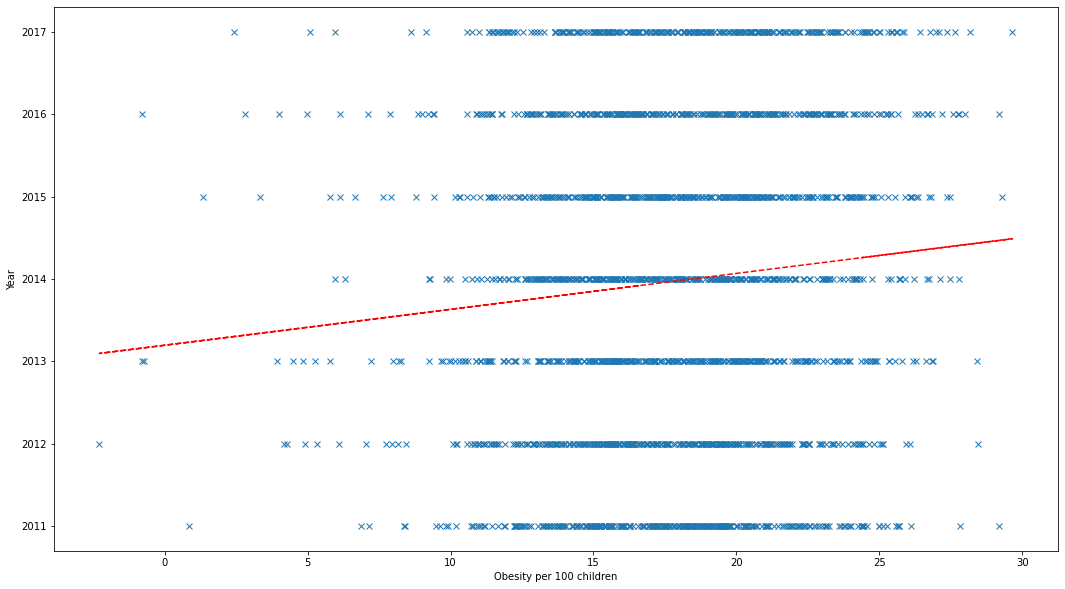

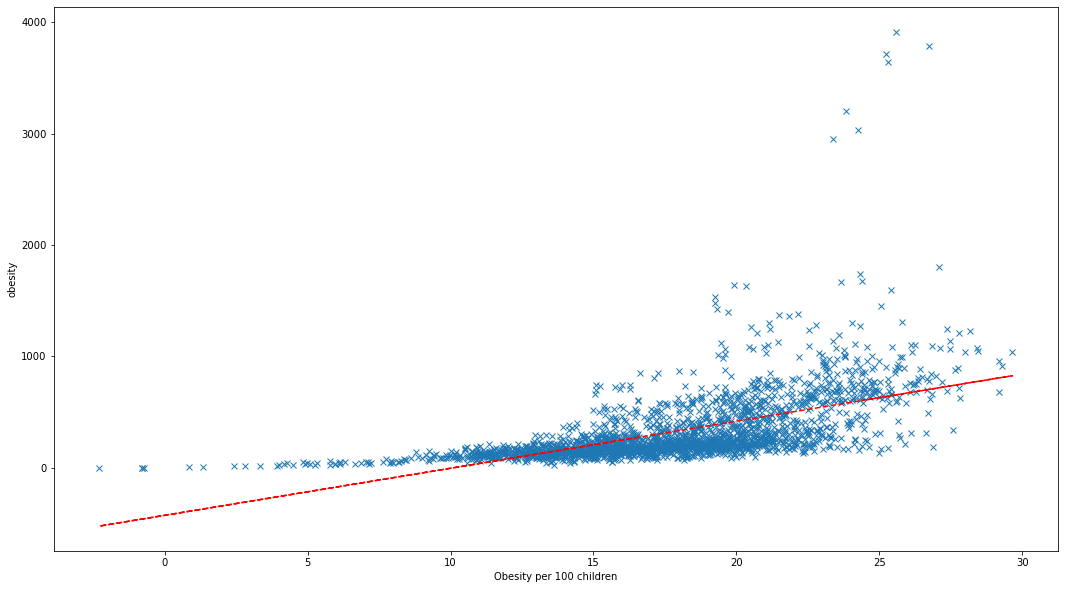

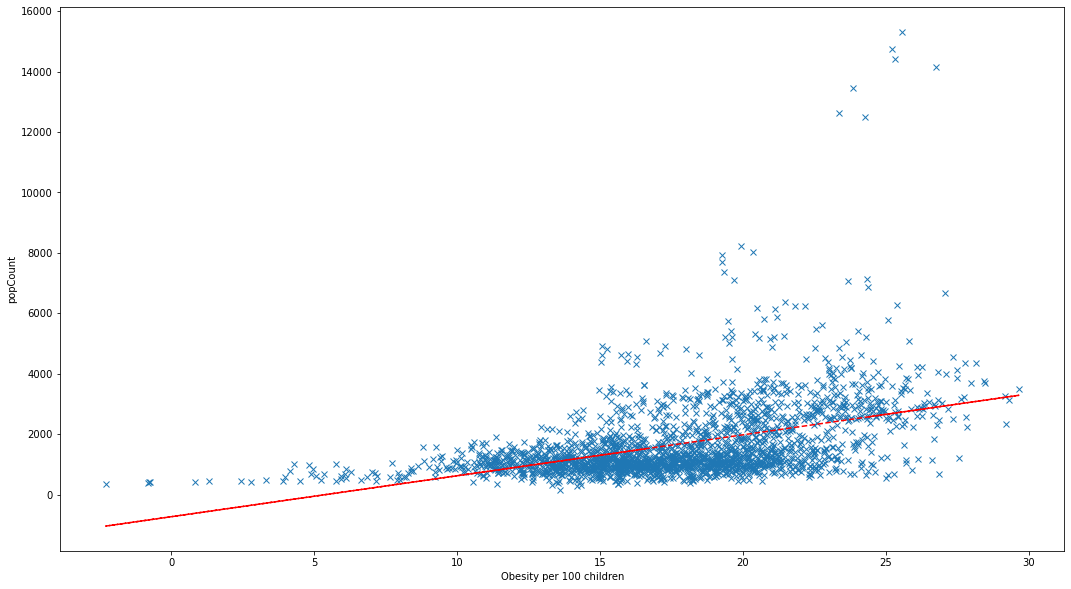

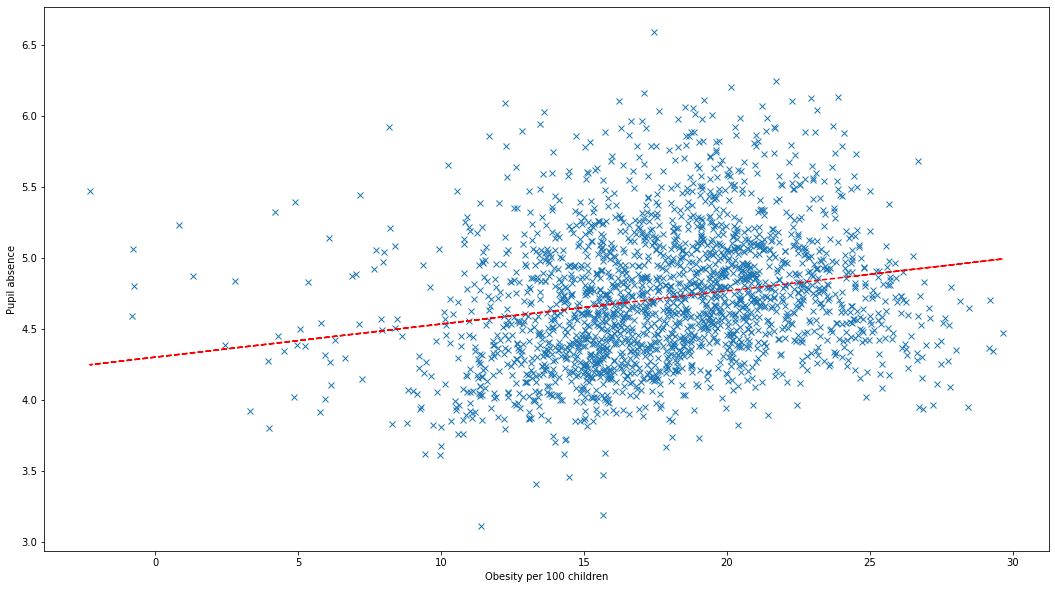

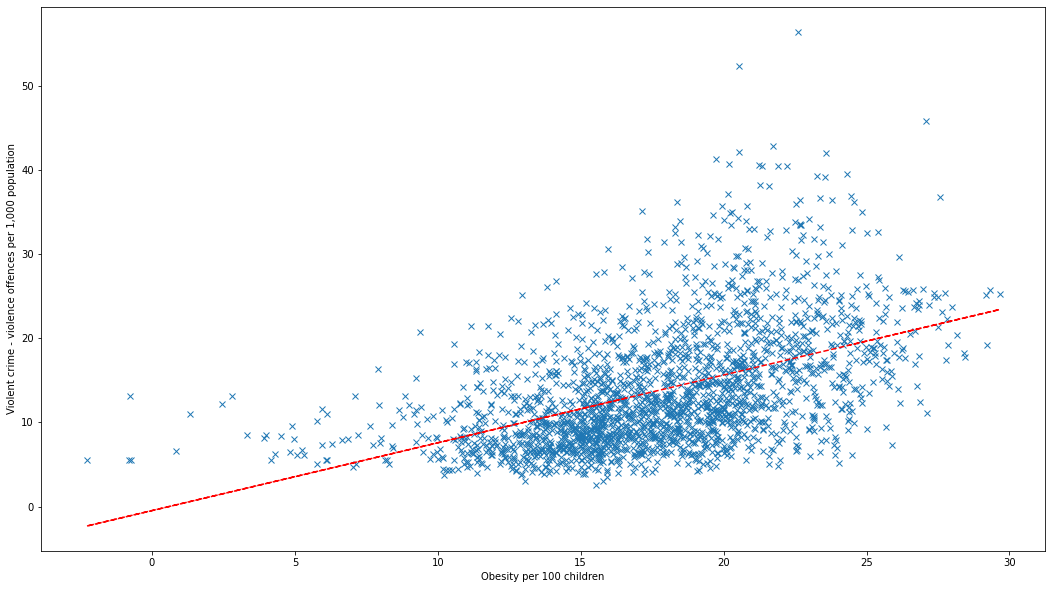

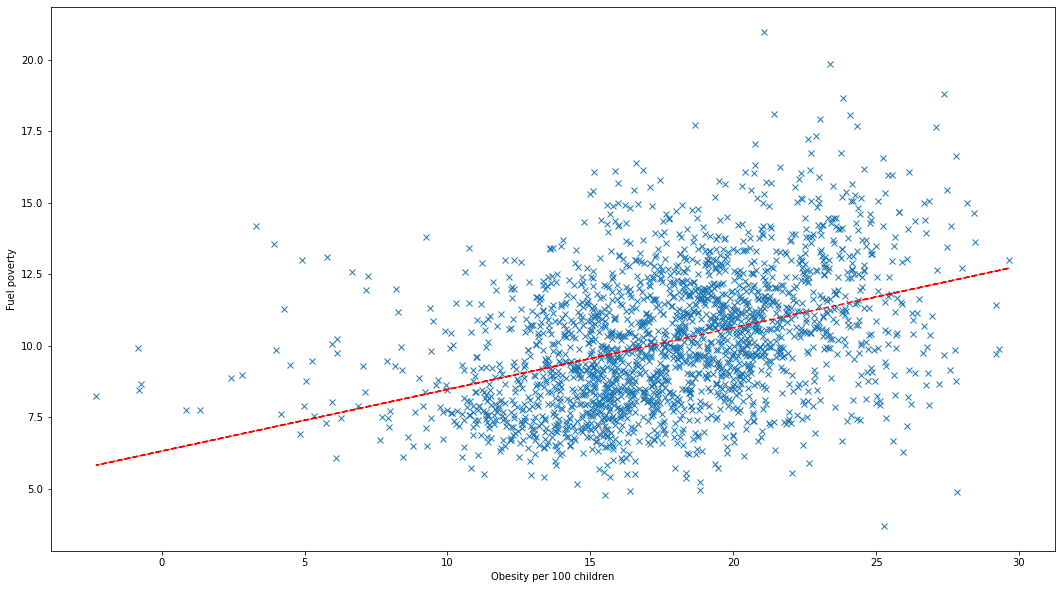

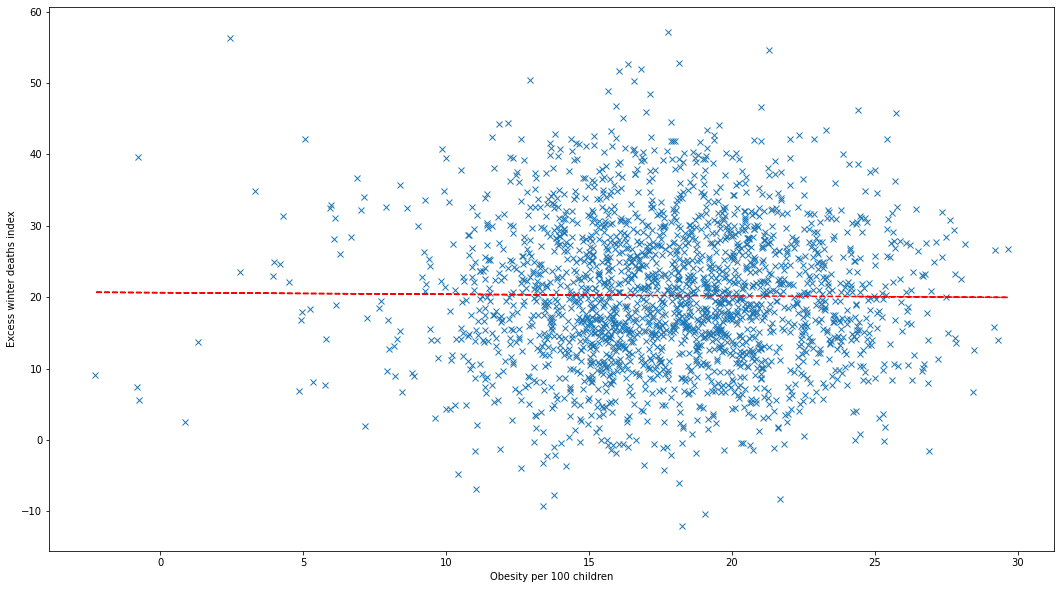

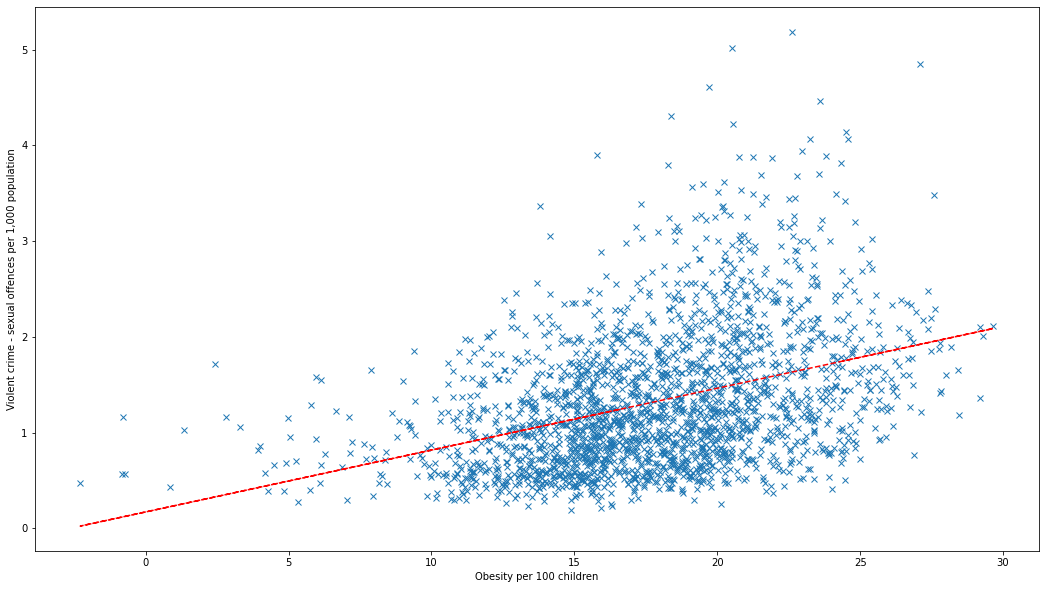

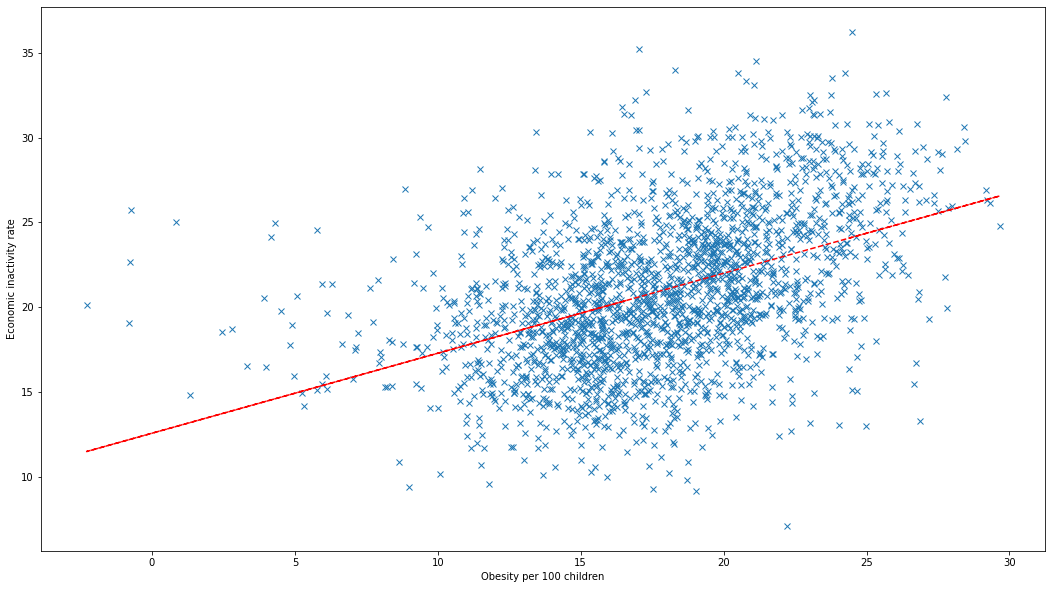

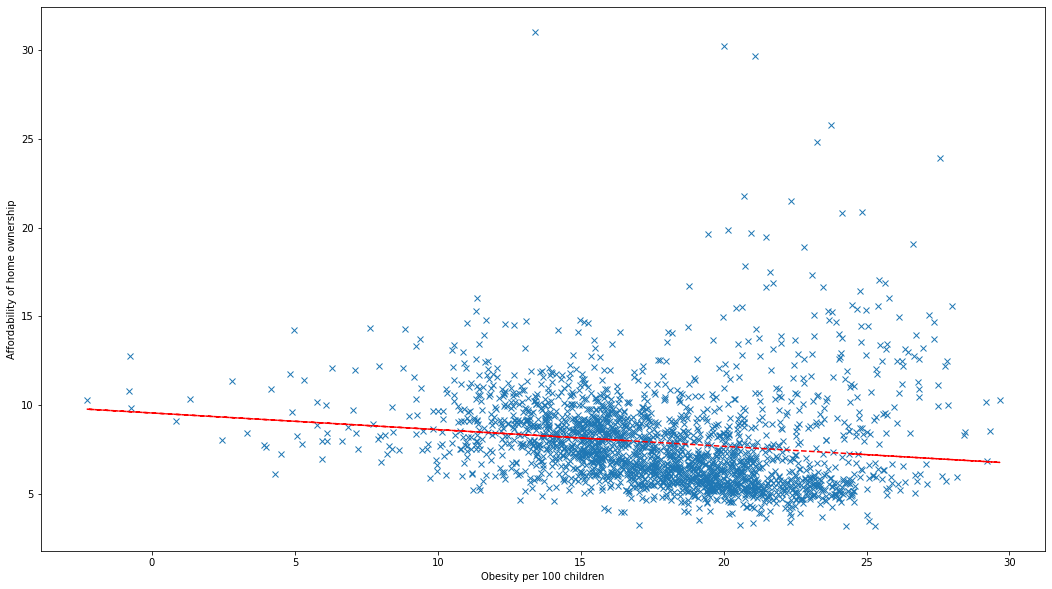

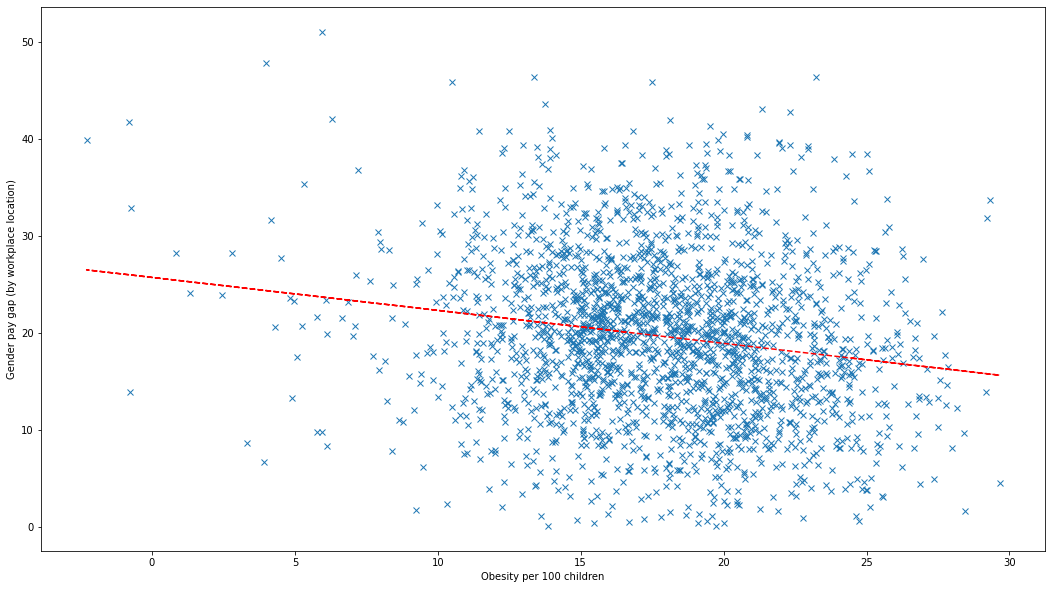

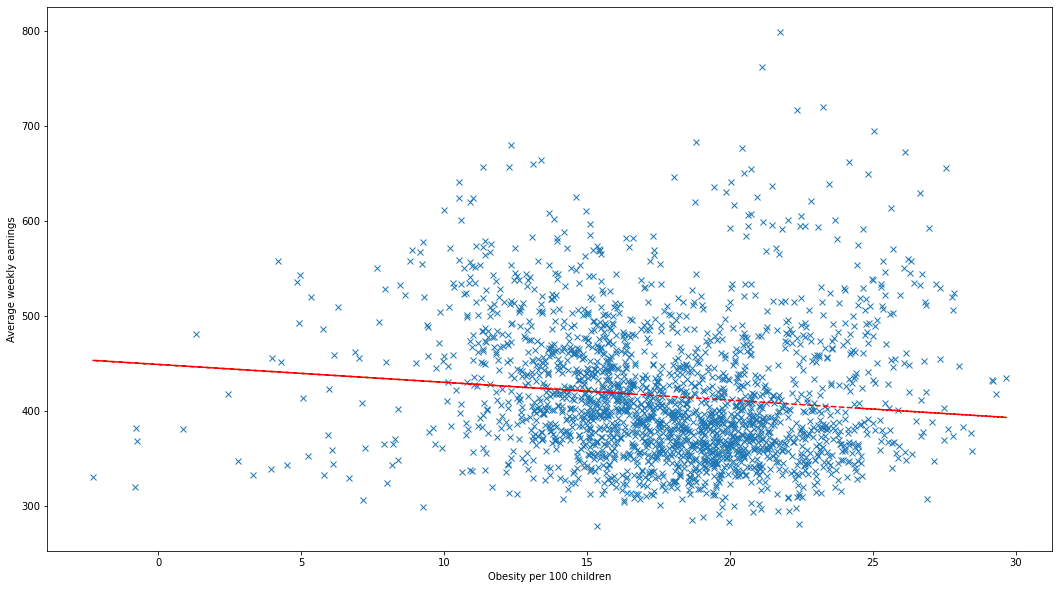

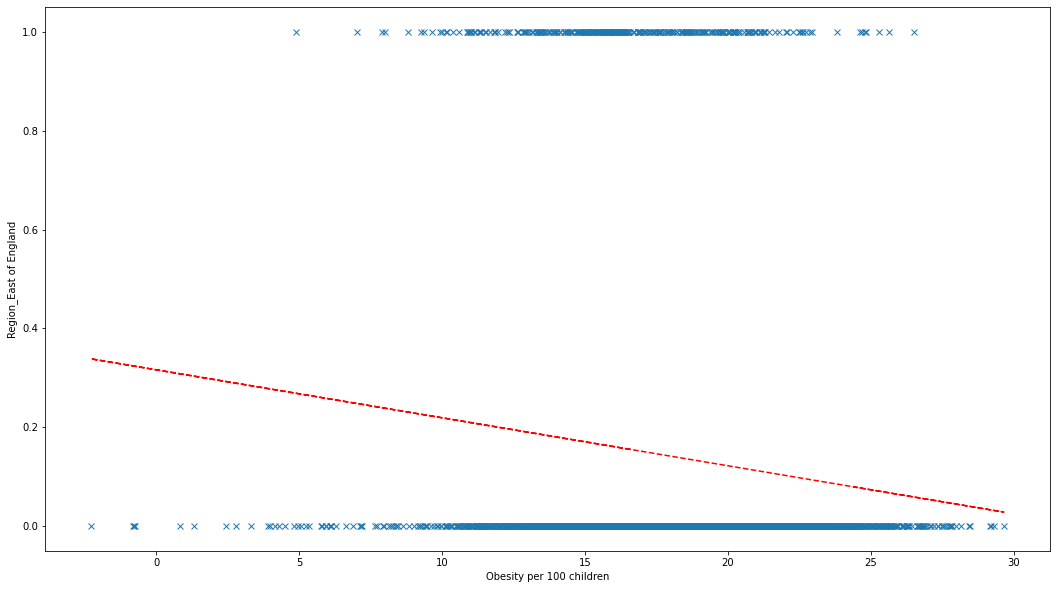

In [57]:
for i in range(len(new_df.columns.values.tolist())):
    i = i + 1
    print(i)
    Plot(new_df[new_df.columns.values[i]])
    plt.ylabel(new_df.columns.values[i])
    plt.xlabel("Obesity per 100 children")
    if i == 13:
        break

In [ ]:
new_df.columns.values[1]